## 1. 每日總收益相關性分析
### 1.1. label和每日總收益的關係

In [1]:
import pandas as pd
import numpy as np

training_set = pd.read_csv('../data/train_origin.csv')
training_label = pd.read_csv('../data/train_label.csv')
training_set = training_set.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'})

monthName = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthNum = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ]
dailyRevenueRelatedColumns = [
    'year',
    'month',
    'day',
    'hotel',
    'adr',
    'stays_in_weekend_nights',
    'stays_in_week_nights'
]

revenuePerOrder = training_set.loc[training_set['is_canceled']==0, dailyRevenueRelatedColumns]
revenuePerOrder = revenuePerOrder.replace(monthName, monthNum)
revenuePerOrder['revenuePerOrder']=revenuePerOrder[dailyRevenueRelatedColumns[4:]]\
    .apply(lambda x:x['adr']*(x['stays_in_weekend_nights']+x['stays_in_week_nights']),axis=1)
revenuePerDay = revenuePerOrder.drop(dailyRevenueRelatedColumns[3:], axis=1)\
    .groupby(dailyRevenueRelatedColumns[0:3]).sum().reset_index().rename(columns={'revenuePerOrder':'revenuePerDay'})
revenuePerDay = pd.concat([revenuePerDay, training_label], axis=1)

revenuePerOrder.to_csv('data/revenuePerOrder.csv')
revenuePerDay.to_csv('data/revenuePerDay.csv')


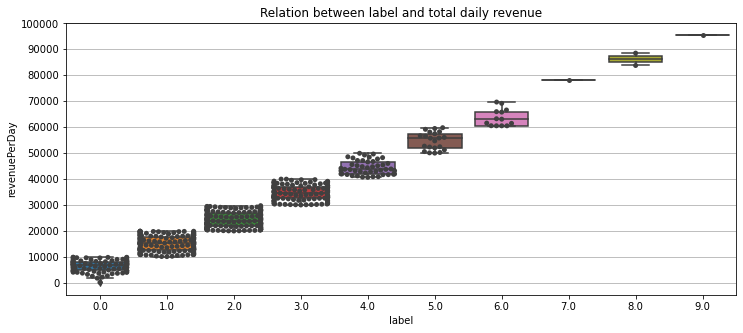

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Relation between label and total daily revenue')
plt.yticks(np.arange(0, 110000, 10000))
plt.ylabel('revenuePerDay')
sns.boxplot(data=revenuePerDay, x='label', y='revenuePerDay')
sns.swarmplot(data=revenuePerDay, x='label', y='revenuePerDay', color=".25")
plt.show()

### 1.2. 每年的日收益分佈

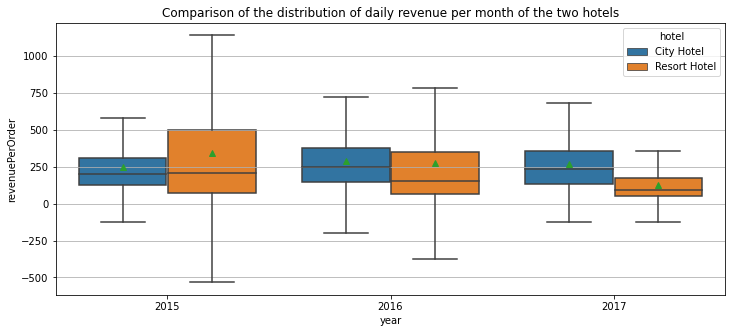

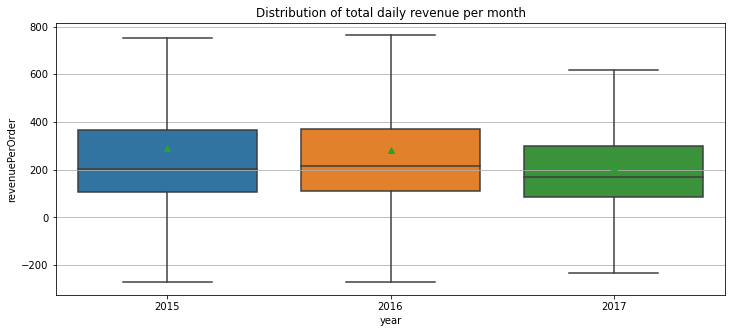

In [3]:
revenuePerOrder = revenuePerOrder.sort_values(by='year')

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Comparison of the distribution of daily revenue per month of the two hotels')
sns.boxplot(data=revenuePerOrder, x='year', y='revenuePerOrder', hue='hotel', \
            hue_order = ["City Hotel", "Resort Hotel"], showmeans=True, showfliers=False)
plt.show()

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Distribution of total daily revenue per month')
sns.boxplot(data=revenuePerOrder, x='year', y='revenuePerOrder', showmeans=True, showfliers=False)
plt.show()

### 1.3. 每個月的日收益分佈

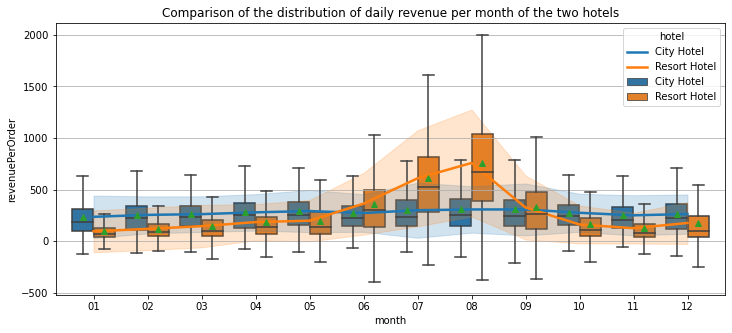

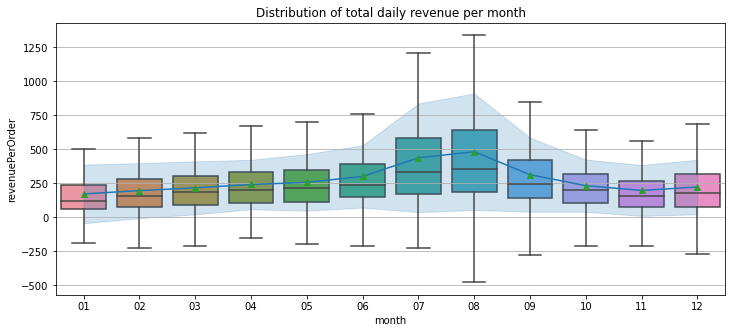

In [4]:
revenuePerOrder = revenuePerOrder.sort_values(by='month')

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Comparison of the distribution of daily revenue per month of the two hotels')
sns.boxplot(data=revenuePerOrder, x='month', y='revenuePerOrder', hue='hotel', \
            hue_order = ["City Hotel", "Resort Hotel"], showmeans=True, showfliers=False)
sns.lineplot(data=revenuePerOrder, x='month', y='revenuePerOrder', hue='hotel', \
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.show()

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Distribution of total daily revenue per month')
sns.boxplot(data=revenuePerOrder, x='month', y='revenuePerOrder', showmeans=True, showfliers=False)
sns.lineplot(data=revenuePerOrder, x='month', y='revenuePerOrder', ci="sd", sizes=(2.5, 2.5))
plt.show()

### 1.4. 不同年份間日收益分佈

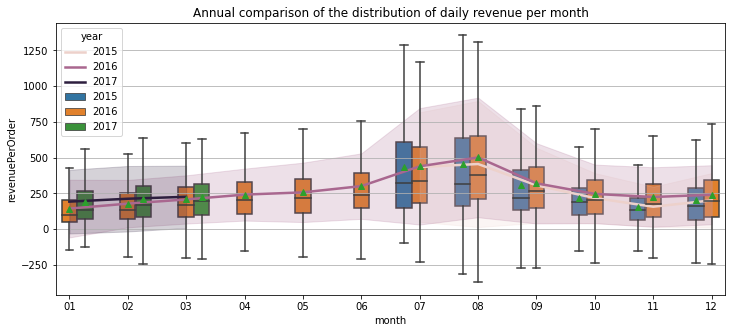

In [5]:
plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Annual comparison of the distribution of daily revenue per month')
sns.boxplot(data=revenuePerOrder, x='month', y='revenuePerOrder', hue='year', \
            showmeans=True, showfliers=False)
sns.lineplot(data=revenuePerOrder, x='month', y='revenuePerOrder', hue='year', \
            ci="sd", size="year", sizes=(2.5, 2.5))
plt.show()

### 1.5. 每個月不同日期的日收益分佈

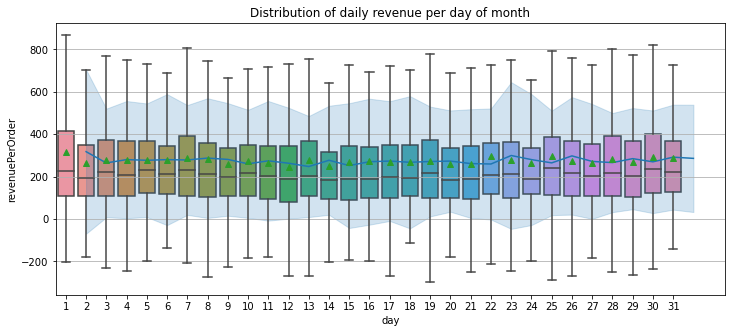

In [6]:
plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Distribution of daily revenue per day of month')
sns.boxplot(data=revenuePerOrder, x='day', y='revenuePerOrder', \
            showmeans=True, showfliers=False)
sns.lineplot(data=revenuePerOrder, x='day', y='revenuePerOrder', \
            ci="sd", sizes=(2.5, 2.5))
plt.show()

### 1.6. 日平均adr和當天日收益的關係(包括取消了的订单)

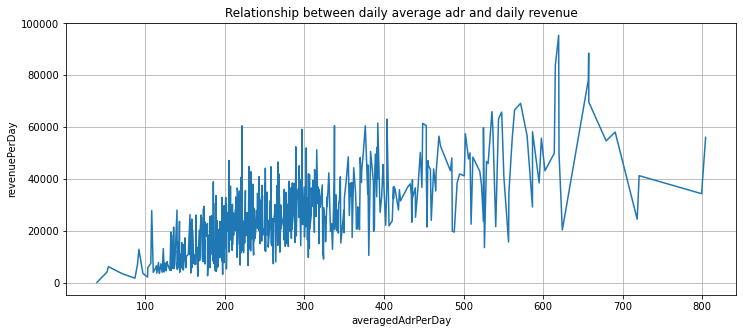

In [7]:
orders = training_set[dailyRevenueRelatedColumns]
orders = orders.replace(monthName, monthNum)
orders['averagedAdrPerDay']=orders[dailyRevenueRelatedColumns[4:]]\
    .apply(lambda x:x['adr']*(x['stays_in_weekend_nights']+x['stays_in_week_nights']),axis=1)
orders = orders.drop(dailyRevenueRelatedColumns[3:], axis=1).groupby(dailyRevenueRelatedColumns[0:3]).mean().reset_index()
merged = pd.merge(orders, revenuePerDay, on=['year', 'month', 'day'])
revenuePerDay.to_csv('data/revenuePerDay.csv')

plt.subplots(figsize=(12,5))
plt.grid()
plt.title('Relationship between daily average adr and daily revenue')
sns.lineplot(data=merged, x='averagedAdrPerDay', y='revenuePerDay', \
            ci="sd", sizes=(2.5, 2.5))
plt.show()